In [16]:
# Fuzzy Logic + Machine Learning
# Deri lezyonlarına benzer morfolojik özellikler üzerinden malignite tespit
# Ad Soyad: Özlem Aalaca
# Numara: 523625016
# Ders: Esnek Programlama



In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#ortam hazırlama ve veri yükleme
data = load_breast_cancer()

X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

X.columns = X.columns.str.replace(" ", "_")
X.head()


,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
#anlamlı özellikler seçildi.tıbbi teşhiste yaygın olarak kullanılan boyutu, dokuyu, yüzey düzgünlüğünü ve simetriyi
selected_features = X.loc[:, [
    "mean_radius",
    "mean_texture",
    "mean_smoothness",
    "mean_symmetry"
]].copy()

selected_features.describe()


,mean_radius,mean_texture,mean_smoothness,mean_symmetry
count,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,0.096360,0.181162
std,3.524049,4.301036,0.014064,0.027414
min,6.981000,9.710000,0.052630,0.106000
25%,11.700000,16.170000,0.086370,0.161900
50%,13.370000,18.840000,0.095870,0.179200
75%,15.780000,21.800000,0.105300,0.195700
max,28.110000,39.280000,0.163400,0.304000


In [4]:
def triangular(x, a, b, c):
    if a == b or b == c:
        return np.zeros_like(x)
    return np.maximum(
        np.minimum((x - a) / (b - a), (c - x) / (c - b)),
        0
    )


In [5]:
def get_memberships(x, min_v, mean_v, max_v):
    low = triangular(x, min_v, (min_v + mean_v) / 2, mean_v)
    medium = triangular(x, min_v, mean_v, max_v)
    high = triangular(x, mean_v, (mean_v + max_v) / 2, max_v)
    return low, medium, high


In [6]:
def plot_fuzzy(feature_name):
    data = selected_features[feature_name]
    x = np.linspace(data.min(), data.max(), 200)

    min_v = data.min()
    mean_v = data.mean()
    max_v = data.max()

    low = triangular(x, min_v, (min_v + mean_v) / 2, mean_v)
    medium = triangular(x, min_v, mean_v, max_v)
    high = triangular(x, mean_v, (mean_v + max_v) / 2, max_v)

    plt.figure()
    plt.plot(x, low, label="Low")
    plt.plot(x, medium, label="Medium")
    plt.plot(x, high, label="High")

    plt.title(f"Fuzzy Membership Functions for {feature_name}")
    plt.xlabel(feature_name)
    plt.ylabel("Membership Degree")
    plt.legend()
    plt.show()



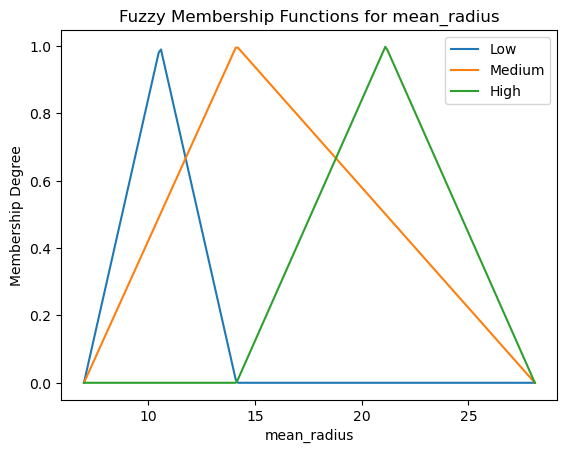

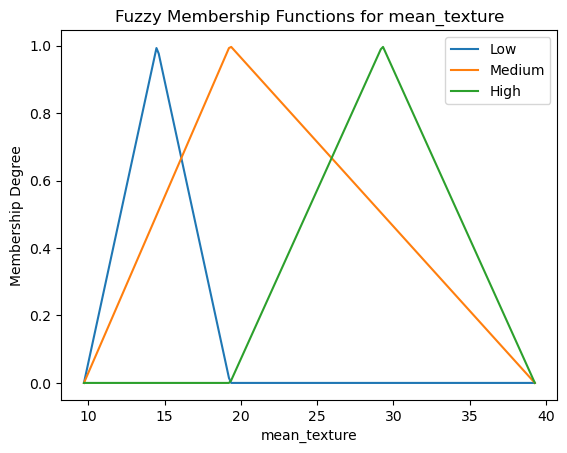

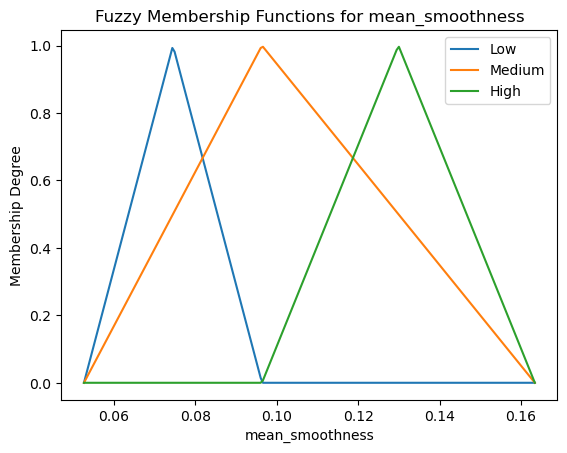

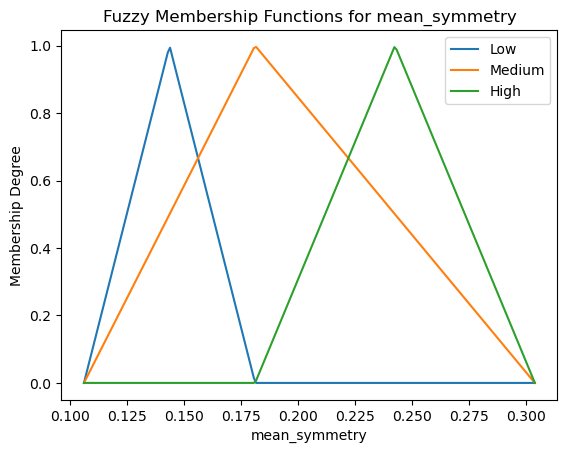

In [7]:
plot_fuzzy("mean_radius")
plot_fuzzy("mean_texture")
plot_fuzzy("mean_smoothness")
plot_fuzzy("mean_symmetry")


In [8]:
#IF–THEN fuzzy kurallar ile risk skoru üretmek
def fuzzy_risk_score(row):

    r = row["mean_radius"]
    t = row["mean_texture"]
    s = row["mean_smoothness"]
    y = row["mean_symmetry"]

    # statistics
    r_min, r_mean, r_max = selected_features["mean_radius"].min(), selected_features["mean_radius"].mean(), selected_features["mean_radius"].max()
    t_min, t_mean, t_max = selected_features["mean_texture"].min(), selected_features["mean_texture"].mean(), selected_features["mean_texture"].max()
    s_min, s_mean, s_max = selected_features["mean_smoothness"].min(), selected_features["mean_smoothness"].mean(), selected_features["mean_smoothness"].max()
    y_min, y_mean, y_max = selected_features["mean_symmetry"].min(), selected_features["mean_symmetry"].mean(), selected_features["mean_symmetry"].max()

    # memberships
    r_low, r_med, r_high = get_memberships(r, r_min, r_mean, r_max)
    t_low, t_med, t_high = get_memberships(t, t_min, t_mean, t_max)
    s_low, s_med, s_high = get_memberships(s, s_min, s_mean, s_max)
    y_low, y_med, y_high = get_memberships(y, y_min, y_mean, y_max)

    # fuzzy rules
    R1 = min(r_high, t_high) * 0.9
    R2 = min(r_med, y_high) * 0.6
    R3 = min(r_low, s_low) * 0.2
    R4 = min(t_med, y_high) * 0.5
    R5 = min(r_high, s_high) * 0.8

    return max(R1, R2, R3, R4, R5)




In [9]:
selected_features = X.loc[:, [
    "mean_radius",
    "mean_texture",
    "mean_smoothness",
    "mean_symmetry"
]].copy()

selected_features["fuzzy_risk"] = selected_features.apply(
    fuzzy_risk_score, axis=1
)

selected_features["fuzzy_risk"].describe()



count    569.000000
mean       0.155266
std        0.163956
min        0.000000
25%        0.033755
50%        0.102906
75%        0.234839
max        0.833234
Name: fuzzy_risk, dtype: float64

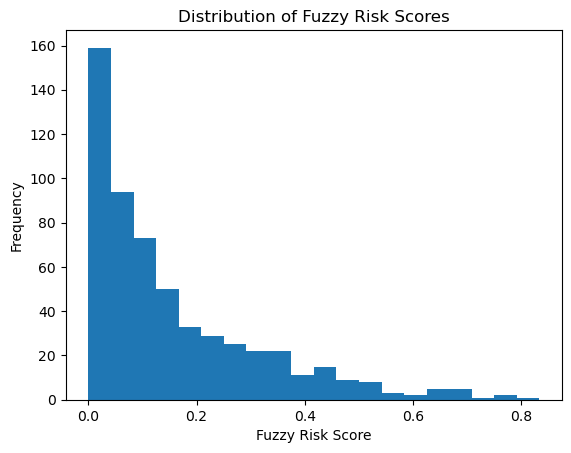

In [10]:
plt.hist(selected_features["fuzzy_risk"], bins=20)
plt.xlabel("Fuzzy Risk Score")
plt.ylabel("Frequency")
plt.title("Distribution of Fuzzy Risk Scores")
plt.show()



In [11]:
#klasik ML
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [12]:
X_classic = selected_features.drop(columns=["fuzzy_risk"])

X_train, X_test, y_train, y_test = train_test_split(
    X_classic, y, test_size=0.3, random_state=42
)

model_classic = LogisticRegression(max_iter=1000)
model_classic.fit(X_train, y_train)

acc_classic = accuracy_score(y_test, model_classic.predict(X_test))


In [13]:
#fuzzy+ML Model
X_fuzzy = selected_features[["fuzzy_risk"]]

X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(
    X_fuzzy, y, test_size=0.3, random_state=42
)

model_fuzzy = LogisticRegression(max_iter=1000)
model_fuzzy.fit(X_train_f, y_train_f)

acc_fuzzy = accuracy_score(y_test_f, model_fuzzy.predict(X_test_f))


In [14]:
print("Classic ML Accuracy:", acc_classic)
print("Fuzzy + ML Accuracy:", acc_fuzzy)


Classic ML Accuracy: 0.9181286549707602
Fuzzy + ML Accuracy: 0.7953216374269005


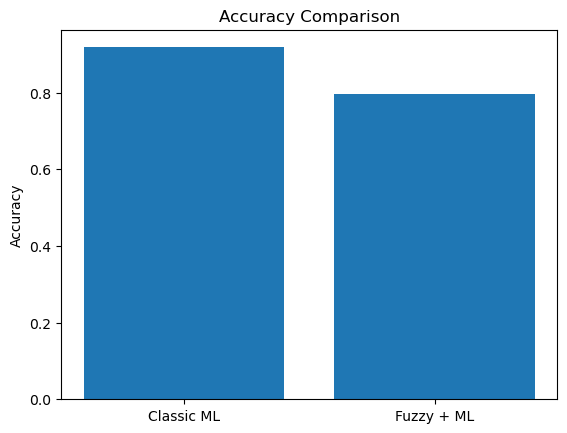

In [15]:
plt.bar(["Classic ML", "Fuzzy + ML"], [acc_classic, acc_fuzzy])
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison")
plt.show()
